# Практическое задание 8. 

## Выполнение разведочного (исследовательского) анализа данных (EDA). Проверка гипотез

**Исходный датасет:**
  https://github.com/OlesiaAngel/DataAnalitics/blob/main/%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5/bank.csv?raw=true
sep=';'
    
- Шаг 1. Выполнните EDA анализ по следующим пунктам :     
1. Каков средний возраст холостых (значение *Не женат / не замужем*) клиентов? Постройте boxplot
1. В какой день недели (признак *День недели*) чаще всего звонили клиентам, отказавшимся от депозита? Постройте столбчатую диаграмму.
1. Постройте график по признакам *Семейный статус* и *y*. Какие выводы можно сделать?
1. Если ли связь между наличием кредита (признак *Долг по кредиту*) у клиента и результатом *y*? Найдите коэффициент корреляции.
1. Визуализируйте информацию об уровне образования в зависимости от среднего возраста. Есть ли статистически значимая взаимосвязь между ними?
1. Что можно сказать о связи между длительностью контакта (признак *Длительность*) и возрастом клиента? Найдите коэффициент корреляции.
1. Как связаны признаки *Образование* и *Ипотека*?

- Шаг 2. Составьте собственную гипотезу о данных и выполните ее проверку.
- Шаг 3. Оформите выводы по каждому пункту из шага 1.
- Шаг 4. Опубликуйте  файл расширения ipynb на платформе Odin.

# Описание набора данных ¶

Признак|Описание
--:|:--
**Сведения о клиенте:**|-
1 - Возраст | (числовой)
2 - Работа | тип работы (категория: 'Самозанятый', 'Преддприниматель', 'Рабочий класс', 'Менеджер', 'Техник', 'Студент', 'Домохозяйка', 'Обслуживающий персонал', 'Пенсионер', 'неизвестный')
3 - Семейный статус | семейное положение (категория: 'Не женат / не замужем', 'Женат / замужем', 'Разведен(-а)')
4 - Образование | (категория: 'Университетская степень', 'Базовое (9 классов)', 'Высшая школа', 'Базовое (4 класса)', 'Профессиональный курс', 'Базовое (6 классов)', 'Неграмотный')
5 - Долг по кредиту | есть неоплата своевременно процентов или основного долга по долговым обязательствам? (категория: «нет», «да», «неизвестно»)
6 - Ипотека | есть жилищный кредит? (категория: «нет», «да», «неизвестно»)
7 - Займ | есть личный кредит? (категория: «нет», «да», «неизвестно»)
**Связано с последним контактом текущей кампании:** |-
8 - Контакт | контактный тип связи (категория: 'Сотовый', 'Городской телефон')
9 - Месяц | месяц последнего контакта в году (категория: «январь», «февраль», «март», ..., «ноябрь», «декабрь»)
10 - День недели | последний контактный день недели (категория: 'пн', 'вт', 'ср', 'чт', 'пт')
11 - Длительность | продолжительность последнего контакта в секундах (числовое). Важное примечание: этот атрибут сильно влияет на цель вывода (например, если длительность=0, то y='no'). Тем не менее, продолжительность не известна до выполнения вызова. Кроме того, после окончания вызова y, очевидно, известен. Таким образом, эти входные данные должны быть включены только для целей сравнительного анализа и должны быть отброшены, если намерение состоит в том, чтобы иметь реалистичную прогностическую модель.
**Другие атрибуты:** |-
12 - Кампания | количество контактов, выполненных во время этой кампании и для этого клиента (числовое, включая последний контакт)
13 - День | количество дней, прошедших с момента последнего контакта с клиентом из предыдущей кампании (числовое число; 999 означает, что с клиентом ранее не связывались)
14 - Предыдущий контракт | количество контактов, выполненных до этой кампании и для этого клиента (числовое)
15 - Доходность | результат предыдущей маркетинговой кампании (категория: 'Отсутствует', 'Не присутствует', 'Присутствует').
**Атрибуты социального и экономического контекста** |-
16 - Колебание уровня безработицы | коэффициент изменения занятости - квартальный индикатор (числовой)
17 - Индекс потребительских цен | индекс потребительских цен - месячный индикатор (числовой)
18 - Индекс потребительской уверенности | индекс доверия потребителей - месячный показатель (числовой)
19 - Европейская межбанковская ставка | трехмесячная ставка euribor - дневной индикатор (числовой)
20 - Количество сотрудников в компании | количество работников - квартальный показатель (числовой)
**Выходная переменная (желаемая цель):** |-
21 - y | (бинарный: «Да», «Нет») представитель службы поддержки звонит клиенту и клиент соглашается или нет открыть банковский срочный вклад.

In [1]:
#Ваш код
import numpy as np
import pandas as pd
pd.set_option("display.precision", 1)

print (np.__version__)
print (pd.__version__)

1.20.1
1.2.4


In [2]:
df = pd.read_csv('https://github.com/OlesiaAngel/DataAnalitics/blob/main/%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5/bank.csv?raw=true', sep=';')

In [3]:
df.head()

,Возраст,Работа,Семейный статус,Образование,Долг по кредиту,Ипотека,Займ,Контакт,Месяц,День недели,...,Кампания,День,Предыдущий контакт,Доходность,Колебание уровня безработицы,Индекс потребительских цен,Индекс потребительской уверенности,Европейская межбанковская ставка,Количество сотрудников в компании,y
0,27,Самозанятый,Не женат / не замужем,Университетская степень,Нет,Нет,Нет,Городской телефон,Октябрь,Пятница,...,1,999,0,Отсутствует,-0.1,93.8,-40.4,5.0,5195.8,Нет
1,30,Преддприниматель,Женат / замужем,Университетская степень,Нет,Нет,Нет,Городской телефон,Октябрь,Пятница,...,1,999,0,Отсутствует,-0.1,93.8,-40.4,5.0,5195.8,Да
2,39,Рабочий класс,Женат / замужем,Базовое (9 классов),Нет,Нет,Нет,Городской телефон,Октябрь,Пятница,...,1,999,0,Отсутствует,-0.1,93.8,-40.4,5.0,5195.8,Да
3,42,Менеджер,Женат / замужем,Высшая школа,Нет,Да,Да,Городской телефон,Октябрь,Пятница,...,1,999,0,Отсутствует,-0.1,93.8,-40.4,5.0,5195.8,Да
4,42,Самозанятый,Женат / замужем,Базовое (4 класса),Нет,Нет,Нет,Городской телефон,Октябрь,Пятница,...,1,999,0,Отсутствует,-0.1,93.8,-40.4,5.0,5195.8,Да


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Возраст                             41188 non-null  int64  
 1   Работа                              41188 non-null  object 
 2   Семейный статус                     41188 non-null  object 
 3   Образование                         41188 non-null  object 
 4   Долг по кредиту                     41188 non-null  object 
 5   Ипотека                             41188 non-null  object 
 6   Займ                                41188 non-null  object 
 7   Контакт                             41188 non-null  object 
 8   Месяц                               41188 non-null  object 
 9   День недели                         41188 non-null  object 
 10  Длительность                        41188 non-null  int64  
 11  Кампания                            41188

In [5]:
df.isnull().sum()

Возраст                               0
Работа                                0
Семейный статус                       0
Образование                           0
Долг по кредиту                       0
Ипотека                               0
Займ                                  0
Контакт                               0
Месяц                                 0
День недели                           0
Длительность                          0
Кампания                              0
День                                  0
Предыдущий контакт                    0
Доходность                            0
Колебание уровня безработицы          0
Индекс потребительских цен            0
Индекс потребительской уверенности    0
Европейская межбанковская ставка      0
Количество сотрудников в компании     0
y                                     0
dtype: int64

In [6]:
df.duplicated().sum()

12

In [7]:
df.drop_duplicates()

,Возраст,Работа,Семейный статус,Образование,Долг по кредиту,Ипотека,Займ,Контакт,Месяц,День недели,...,Кампания,День,Предыдущий контакт,Доходность,Колебание уровня безработицы,Индекс потребительских цен,Индекс потребительской уверенности,Европейская межбанковская ставка,Количество сотрудников в компании,y
0,27,Самозанятый,Не женат / не замужем,Университетская степень,Нет,Нет,Нет,Городской телефон,Октябрь,Пятница,...,1,999,0,Отсутствует,-0.1,93.8,-40.4,5.0,5195.8,Нет
1,30,Преддприниматель,Женат / замужем,Университетская степень,Нет,Нет,Нет,Городской телефон,Октябрь,Пятница,...,1,999,0,Отсутствует,-0.1,93.8,-40.4,5.0,5195.8,Да
2,39,Рабочий класс,Женат / замужем,Базовое (9 классов),Нет,Нет,Нет,Городской телефон,Октябрь,Пятница,...,1,999,0,Отсутствует,-0.1,93.8,-40.4,5.0,5195.8,Да
3,42,Менеджер,Женат / замужем,Высшая школа,Нет,Да,Да,Городской телефон,Октябрь,Пятница,...,1,999,0,Отсутствует,-0.1,93.8,-40.4,5.0,5195.8,Да
4,42,Самозанятый,Женат / замужем,Базовое (4 класса),Нет,Нет,Нет,Городской телефон,Октябрь,Пятница,...,1,999,0,Отсутствует,-0.1,93.8,-40.4,5.0,5195.8,Да
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,68,Пенсионер,Разведен(-а),Высшая школа,Нет,Да,Нет,Сотовый телефон,Октябрь,Понедельник,...,1,999,0,Отсутствует,-1.1,94.6,-49.5,1.0,4963.6,Да
41184,68,Пенсионер,Разведен(-а),Высшая школа,Нет,Да,Да,Сотовый телефон,Октябрь,Понедельник,...,1,3,1,Присутствует,-1.1,94.6,-49.5,1.0,4963.6,Да
41185,74,Пенсионер,Разведен(-а),Базовое (4 класса),Нет,Да,Нет,Сотовый телефон,Октябрь,Понедельник,...,3,3,2,Присутствует,-1.1,94.6,-49.5,1.0,4963.6,Нет
41186,74,Пенсионер,Разведен(-а),Базовое (4 класса),Нет,Да,Нет,Сотовый телефон,Октябрь,Понедельник,...,2,999,0,Отсутствует,-1.1,94.6,-49.5,1.0,4963.6,Нет


In [8]:
df.describe()

,Возраст,Длительность,Кампания,День,Предыдущий контакт,Колебание уровня безработицы,Индекс потребительских цен,Индекс потребительской уверенности,Европейская межбанковская ставка,Количество сотрудников в компании
count,41188.0,41188.0,41188.0,41188.0,41188.0,4.1e+04,41188.0,41188.0,41188.0,41188.0
mean,40.0,258.3,2.6,962.5,0.2,8.2e-02,93.6,-40.5,3.6,5167.0
std,10.4,259.3,2.8,186.9,0.5,1.6e+00,0.6,4.6,1.7,72.3
min,17.0,0.0,1.0,0.0,0.0,-3.4e+00,92.2,-50.8,0.6,4963.6
25%,32.0,102.0,1.0,999.0,0.0,-1.8e+00,93.1,-42.7,1.3,5099.1
50%,38.0,180.0,2.0,999.0,0.0,1.1e+00,93.7,-41.8,4.9,5191.0
75%,47.0,319.0,3.0,999.0,0.0,1.4e+00,94.0,-36.4,5.0,5228.1
max,98.0,4918.0,56.0,999.0,7.0,1.4e+00,94.8,-26.9,5.0,5228.1


## Сведения о клиенте:

- Возраст от 17 до 95
- было выявлено неоднозначное написание слова Самозанятый в признаке Работа, исправила
- Семейный статус - не известен 80 строк, что составляет 0,19% от общего количества строк. Удалим строки
- Образование - не известно 1722 строк, что составляет 4.19% от общего количества строк

- Ипотека - не известно 990 строк, что составляет 2.4% от общего количества строк.Удалим строки, при удалении строк ушли строки Займ с неизвестным значением
- Займ - не известно 990 строк, что составляет 2.4% от общего количества строк.
- Долг по кредиту - не известно 8359 строк, что составляет 20.84% от общего количества строк. 

In [9]:
print('\033[1m'+ 'Уникальные значения'+'\033[0m'+'\n')
for i in df.columns.to_list():
    print('\033[91m'+ 'Признак {} имеет {} следующих уникальных значений:'.format(i, len(df[i].unique()))+'\033[0m')
    print(df[i].unique())
    print('\033[1m' + '---------------------------------------------------------------------------------'+ '\033[0m') 

Уникальные значения

Признак Возраст имеет 78 следующих уникальных значений:
[27 30 39 42 43 44 46 56 29 31 32 33 34 35 36 37 38 40 41 45 47 48 49 50
 51 52 53 54 55 57 58 59 60 22 24 25 26 28 23 21 20 19 61 18 70 66 76 67
 73 88 95 77 68 75 63 62 80 65 72 64 82 69 71 85 78 79 81 83 74 84 92 17
 86 89 87 91 98 94]
---------------------------------------------------------------------------------
Признак Работа имеет 11 следующих уникальных значений:
['Самозанятый' 'Преддприниматель' 'Рабочий класс' 'Менеджер' 'Техник'
 'Неизвестно' 'Студент' 'Домохозяйка' 'Обслуживающий персонал' 'Пенсионер'
 'Cамозанятый']
---------------------------------------------------------------------------------
Признак Семейный статус имеет 4 следующих уникальных значений:
['Не женат / не замужем' 'Женат / замужем' 'Разведен(-а)' 'Неизвестно']
---------------------------------------------------------------------------------
Признак Образование имеет 8 следующих уникальных значений:
['Университетская степень' '

In [10]:
#В столбце Работа слово Самозанятый написано двузначно, убрала неоднозначность
df.loc[(df.Работа == 'Cамозанятый'),'Работа'] = 'Самозанятый'

In [11]:
num_ss = df[df['Семейный статус'] == 'Неизвестно']['Семейный статус'].count()
num_ss

80

In [12]:
proc_ss = num_ss / df.Возраст.count() * 100
proc_ss.round(2)

0.19

In [13]:
# убрала значения признака Семейный статус 'Неизвестно'
df = df[df['Семейный статус'] != 'Неизвестно']


In [14]:
num_o = df[df['Образование'] == 'Неизвестно']['Образование'].count()
num_o

1722

In [15]:
proc_o = num_o / df.Возраст.count() * 100
proc_o.round(2)

4.19

In [16]:
num_dk = df[df['Долг по кредиту'] == 'Неизвестно']['Долг по кредиту'].count()
num_dk

8586

In [17]:
proc_dk = num_dk / df.Возраст.count() * 100
proc_dk.round(2)

20.89

In [18]:
num_ip = df[df.Ипотека == 'Неизвестно'].Ипотека.count()
num_ip

989

In [19]:
proc_ip = num_ip / df.Возраст.count() * 100
proc_ip.round(2)

2.41

In [20]:
# удалила у признака Ипотека значения Неизвестно
df = df[df.Ипотека != 'Неизвестно']

In [21]:
df = df.replace({"День": 999,
                 "Работа": "Неизвестно",
                 "Образование": "Неизвестно",
                 "Долг по кредиту": "Неизвестно",
                 }, np.nan)

In [22]:
df.isnull().sum()

Возраст                                   0
Работа                                  316
Семейный статус                           0
Образование                            1682
Долг по кредиту                        8359
Ипотека                                   0
Займ                                      0
Контакт                                   0
Месяц                                     0
День недели                               0
Длительность                              0
Кампания                                  0
День                                  38643
Предыдущий контакт                        0
Доходность                                0
Колебание уровня безработицы              0
Индекс потребительских цен                0
Индекс потребительской уверенности        0
Европейская межбанковская ставка          0
Количество сотрудников в компании         0
y                                         0
dtype: int64

In [23]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
df["Работа"] = imputer.fit_transform(df["Работа"].values.reshape(-1,1))[:,0]
df["Долг по кредиту"] = imputer.fit_transform(df["Долг по кредиту"].values.reshape(-1,1))[:,0]
df["Образование"] = imputer.fit_transform(df["Образование"].values.reshape(-1,1))[:,0]

In [24]:
df.isnull().sum()

Возраст                                   0
Работа                                    0
Семейный статус                           0
Образование                               0
Долг по кредиту                           0
Ипотека                                   0
Займ                                      0
Контакт                                   0
Месяц                                     0
День недели                               0
Длительность                              0
Кампания                                  0
День                                  38643
Предыдущий контакт                        0
Доходность                                0
Колебание уровня безработицы              0
Индекс потребительских цен                0
Индекс потребительской уверенности        0
Европейская межбанковская ставка          0
Количество сотрудников в компании         0
y                                         0
dtype: int64

## Связано с последним контактом текущей кампании
- Контакт	
- Месяц
- День недели	
- Длительность	

Информация корректно записана

### Провела очистку данных

### 1. Каков средний возраст холостых (значение Не женат / не замужем) клиентов? Постройте boxplot

In [25]:
import seaborn as sns

In [26]:
df_filter = df[df['Семейный статус'] == 'Не женат / не замужем']
df_filter.describe()

,Возраст,Длительность,Кампания,День,Предыдущий контакт,Колебание уровня безработицы,Индекс потребительских цен,Индекс потребительской уверенности,Европейская межбанковская ставка,Количество сотрудников в компании
count,11288.0,11288.0,11288.0,557.0,11288.0,11288.0,11288.0,11288.0,11288.0,11288.0
mean,33.1,261.2,2.5,6.2,0.2,-0.2,93.5,-40.9,3.3,5155.2
std,7.5,263.6,2.7,4.0,0.6,1.6,0.6,4.8,1.8,77.9
min,17.0,1.0,1.0,0.0,0.0,-3.4,92.2,-50.8,0.6,4963.6
25%,28.0,103.0,1.0,3.0,0.0,-1.8,93.0,-46.2,1.3,5099.1
50%,32.0,182.0,2.0,6.0,0.0,1.1,93.4,-42.0,4.9,5191.0
75%,37.0,326.0,3.0,7.0,0.0,1.4,94.0,-36.4,5.0,5228.1
max,86.0,4918.0,43.0,22.0,6.0,1.4,94.8,-26.9,5.0,5228.1


<AxesSubplot:xlabel='Семейный статус', ylabel='Возраст'>

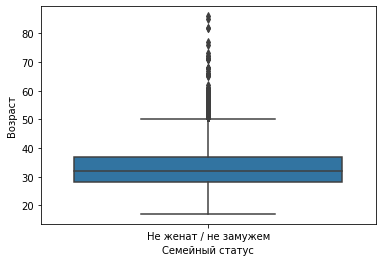

In [27]:
sns.boxplot(x='Семейный статус', y='Возраст', data=df_filter)

### Вывод: средний возраст по категории "Не женат / не замужем" - 33,1

### 2. В какой день недели (признак День недели) чаще всего звонили клиентам, отказавшимся от депозита? Постройте столбчатую диаграмму.

In [28]:
df_filtr_y = df[df.y == 'Нет'].groupby('День недели').y.count().reset_index()
df_filtr_y.columns = ['День недели', 'Количество']
df_filtr_y

,День недели,Количество
0,Вторник,6946
1,Понедельник,7478
2,Пятница,6786
3,Среда,6993
4,Четверг,7395


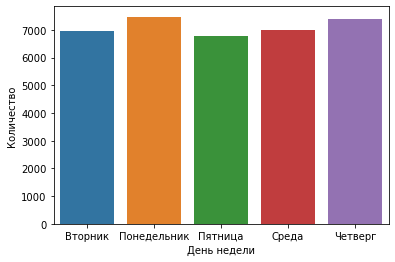

In [29]:
sns.barplot(x="День недели", y="Количество", data=df_filtr_y);

### Вывод: чаще всего отказавшимся звонили в понедельник

### 3. Постройте график по признакам Семейный статус и y. Какие выводы можно сделать?

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

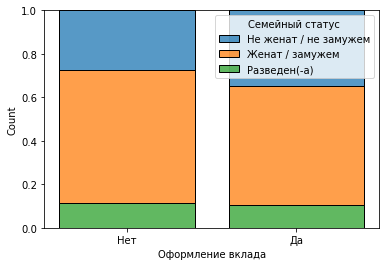

In [31]:
sns.histplot(x = 'y', hue = 'Семейный статус', data = df, multiple = "fill", shrink = 0.8)
plt.xlabel('Оформление вклада');

### Вывод: 
Чаще отрицательный ответ давали респонденты со статусом "Женат/заужем", охотее соглашались респонденты со статусом "не женат/не замужем". Разведенные равны в отрицательном и положительном ответе

In [32]:
### 4. Есть ли связь между наличием кредита (признак Долг по кредиту) у клиента и результатом y? Найдите коэффициент корреляции.

In [33]:
df_filtr_credit_y = df[['Долг по кредиту','y']] 
df_filtr_credit_y

,Долг по кредиту,y
0,Нет,Нет
1,Нет,Да
2,Нет,Да
3,Нет,Да
4,Нет,Да
...,...,...
41183,Нет,Да
41184,Нет,Да
41185,Нет,Нет
41186,Нет,Нет


In [34]:
df_filter_credit_kategory = df_filtr_credit_y.replace({'Долг по кредиту':{'Да':1,'Нет':0},'y':{'Да':1,'Нет':0}})
df_filter_credit_kategory

,Долг по кредиту,y
0,0,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
41183,0,1
41184,0,1
41185,0,0
41186,0,0


In [35]:
pd.crosstab(df_filter_credit_kategory['Долг по кредиту'], df_filter_credit_kategory['y'])

y,0,1
Долг по кредиту,,
0,35595,4521
1,3,0


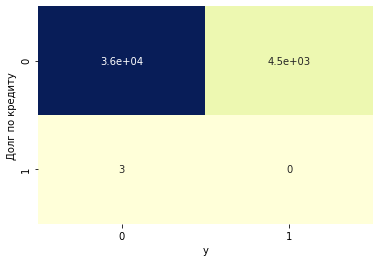

In [36]:
sns.heatmap(pd.crosstab(df_filter_credit_kategory['Долг по кредиту'], df_filter_credit_kategory['y']), 
            cmap="YlGnBu", annot=True, cbar=False);

In [37]:
from scipy.stats import chi2_contingency, fisher_exact

chi2, prob, df1, expected = chi2_contingency(pd.crosstab(df_filter_credit_kategory['Долг по кредиту'], df_filter_credit_kategory['y']))
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
print(output.format(chi2, df1, prob))

test Statistics: 0.0
degrees of freedom: 1
p-value: 1.0



### Вывод:
Полученный коэффициент p-value больше 0,05, что означает отсутствие зависимости между признаками " Долг по кредиту" и "у".   

### 5. Визуализируйте информацию об уровне образования в зависимости от среднего возраста. Есть ли статистически значимая взаимосвязь между ними?

In [38]:
df_filtr_education = df.groupby(['Образование']).Возраст.mean().reset_index()

In [39]:
df_filtr_education = df_filtr_education.replace({'Образование':{'Неграмотный':1,'Базовое (4 класса)':2,'Базовое (6 классов)':3,'Базовое (9 классов)':4,'Профессиональный курс':5,'Высшая школа':6,'Университетская степень':7}})

In [40]:
df_filtr_education = df_filtr_education.groupby(['Образование']).Возраст.mean().reset_index()
df_filtr_education

,Образование,Возраст
0,1,48.5
1,2,47.6
2,3,40.5
3,4,39.1
4,5,40.1
5,6,38.0
6,7,39.5


проверим признаки на выбросы

D:\Anaconda\3-21-05\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Возраст'>

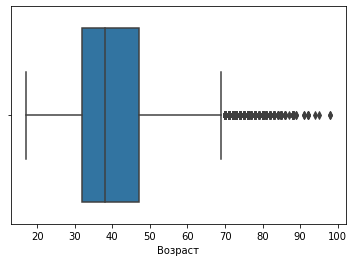

In [41]:
sns.boxplot(df['Возраст'])

In [42]:
df_filter_agg = df[df['Возраст'] > 68]
df_filter_agg


,Возраст,Работа,Семейный статус,Образование,Долг по кредиту,Ипотека,Займ,Контакт,Месяц,День недели,...,Кампания,День,Предыдущий контакт,Доходность,Колебание уровня безработицы,Индекс потребительских цен,Индекс потребительской уверенности,Европейская межбанковская ставка,Количество сотрудников в компании,y
27713,70,Пенсионер,Разведен(-а),Базовое (4 класса),Нет,Да,Нет,Сотовый телефон,Март,Понедельник,...,3,NaN,0,Отсутствует,-1.8,92.8,-50.0,1.8,5099.1,Да
27750,76,Пенсионер,Женат / замужем,Университетская степень,Нет,Нет,Да,Сотовый телефон,Март,Четверг,...,9,NaN,0,Отсутствует,-1.8,92.8,-50.0,1.8,5099.1,Нет
27791,73,Пенсионер,Женат / замужем,Университетская степень,Нет,Да,Нет,Сотовый телефон,Март,Вторник,...,1,NaN,1,Не присутствует,-1.8,92.8,-50.0,1.7,5099.1,Нет
27799,88,Пенсионер,Разведен(-а),Базовое (4 класса),Нет,Да,Нет,Сотовый телефон,Март,Среда,...,1,NaN,0,Отсутствует,-1.8,92.8,-50.0,1.7,5099.1,Нет
27800,88,Пенсионер,Разведен(-а),Базовое (4 класса),Нет,Да,Да,Сотовый телефон,Март,Среда,...,2,NaN,0,Отсутствует,-1.8,92.8,-50.0,1.7,5099.1,Нет
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41143,86,Пенсионер,Женат / замужем,Базовое (4 класса),Нет,Да,Нет,Сотовый телефон,Март,Вторник,...,2,NaN,2,Не присутствует,-1.8,93.4,-34.8,0.6,5008.7,Нет
41154,84,Пенсионер,Разведен(-а),Базовое (4 класса),Нет,Нет,Нет,Сотовый телефон,Апрель,Четверг,...,2,NaN,2,Не присутствует,-1.8,93.7,-34.6,0.6,5008.7,Нет
41185,74,Пенсионер,Разведен(-а),Базовое (4 класса),Нет,Да,Нет,Сотовый телефон,Октябрь,Понедельник,...,3,3.0,2,Присутствует,-1.1,94.6,-49.5,1.0,4963.6,Нет
41186,74,Пенсионер,Разведен(-а),Базовое (4 класса),Нет,Да,Нет,Сотовый телефон,Октябрь,Понедельник,...,2,NaN,0,Отсутствует,-1.1,94.6,-49.5,1.0,4963.6,Нет


удалим выбросы (по возрасту более 68 лет, составляет 1 %)

In [43]:
df_filter_agg68 = df[df['Возраст'] < 68]

D:\Anaconda\3-21-05\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Возраст'>

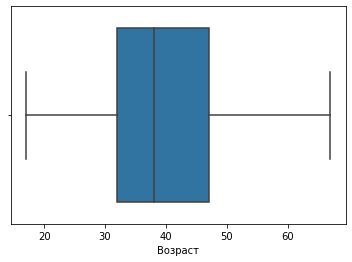

In [44]:
sns.boxplot(df_filter_agg68['Возраст'])

In [45]:
df_filtr_education = df_filter_agg68.replace({'Образование':{'Неграмотный':1,'Базовое (4 класса)':2,'Базовое (6 классов)':3,'Базовое (9 классов)':4,'Профессиональный курс':5,'Высшая школа':6,'Университетская степень':7}})

In [46]:
df_filtr_education = df_filtr_education.groupby(['Образование']).Возраст.mean().reset_index()
df_filtr_education

,Образование,Возраст
0,1,46.6
1,2,45.6
2,3,40.2
3,4,38.9
4,5,39.8
5,6,37.8
6,7,39.1


Text(0, 0.5, 'Образование')

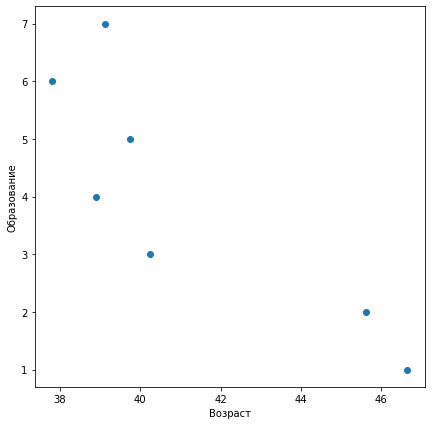

In [47]:
fig, ax = plt.subplots(figsize=(7, 7))
agg = df_filtr_education['Возраст']
education = df_filtr_education['Образование']
plt.scatter(agg, education)
plt.xlabel('Возраст')
plt.ylabel('Образование')


### Вывод:
По диаграмме рассеивания нельзя сделать вывод о взаимосвязи признаков "образование", "возраст". Отуствует линейность и монотонность зависимости признаков

### 6.Что можно сказать о связи между длительностью контакта (признак Длительность) и возрастом клиента? Найдите коэффициент корреляции.

In [48]:
df_filter_duration = df[['Длительность','Возраст']].groupby(['Возраст']).Длительность.mean().reset_index()
df_filter_duration

,Возраст,Длительность
0,17,400.5
1,18,331.0
2,19,251.8
3,20,288.5
4,21,259.2
...,...,...
73,91,530.0
74,92,527.5
75,94,134.0
76,95,85.0


признак Возраст уже проверен на выброс: необходимо исключить людей, старше 68 лет. Проверим выброс по длительности

D:\Anaconda\3-21-05\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Длительность'>

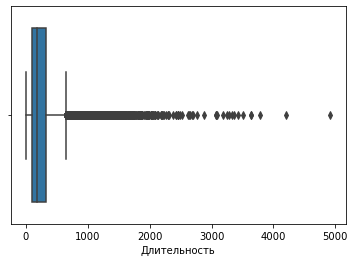

In [49]:
sns.boxplot(df['Длительность'])

In [50]:
df_filter_duration = df[df['Длительность'] < 1000]

D:\Anaconda\3-21-05\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Длительность'>

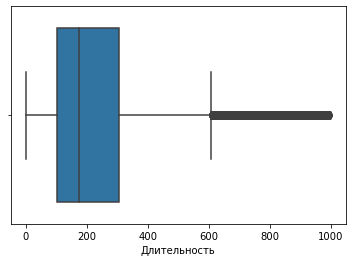

In [51]:
sns.boxplot(df_filter_duration['Длительность'])

In [52]:
df_filter_duration = df[df['Длительность'] < 490]
proc = df[df['Длительность'] < 490].Длительность.count()/df.Длительность.count()*100
proc

87.59939180936713

признак "Длительность" со значениями, отмеченными,как выбросы, составляет 12% от общего количества. 
Заменим значение выброса на значение 490

In [53]:
df.loc[(df.Длительность > 490), 'Длительность'] = 490

D:\Anaconda\3-21-05\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Длительность'>

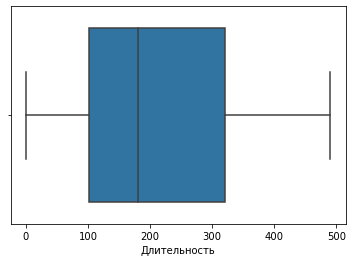

In [54]:
sns.boxplot(df['Длительность'])

In [55]:
df_filter_agg = df[df['Возраст'] < 68]

Text(0, 0.5, 'Длительность')

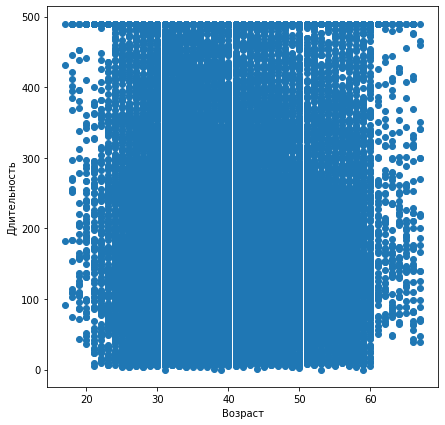

In [56]:
fig, ax = plt.subplots(figsize=(7, 7))
agg = df_filter_agg['Возраст']
duration = df_filter_agg['Длительность']
plt.scatter(agg, duration)
plt.xlabel('Возраст')
plt.ylabel('Длительность')

### Вывод:
диаграмма рассеивания не показывает зависимость длительность разговора от возраста клиента.
Скорее всего длительные разговоры происходят с людьми старшего поколения. Можно отдельно провести анализ взаимосвязи. 
Но, наверно, требуется, в первую очередь, посмотреть, отвечали ли респонденты старшего поколения положительно в признаке у

### 7. Как связаны признаки Образование и Ипотека

In [57]:
df_filter_education = df.replace({'Образование':{'Неграмотный':1,'Базовое (4 класса)':2,'Базовое (6 классов)':3,'Базовое (9 классов)':4,'Профессиональный курс':5,'Высшая школа':6,'Университетская степень':7}})


In [58]:
df_filter_education = df_filter_education.replace({'Ипотека':{'Да':1,'Нет':0}})


In [59]:
chi2, prob, df1, expected = chi2_contingency(pd.crosstab(df_filter_education['Ипотека'], df_filter_education['Образование']))
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
print(output.format(chi2, df1, prob))

test Statistics: 17.8978708940098
degrees of freedom: 6
p-value: 0.006492554022249668



p-value меньше 0.05, значит между признаками есть статистически значимая связь

In [60]:
df_filter_education_ = df_filter_education.groupby(['Ипотека', 'Образование']).agg({'Ипотека': ['count']}). reset_index()
df_filter_education_.columns = ['Ипотека', 'Образование', 'Количество']
df_filter_education_['Среднее'] = df_filter_education_['Количество'] / df_filter_education_['Количество'].sum()
df_filter_education_

,Ипотека,Образование,Количество,Среднее
0,0,1,8,2.0e-04
1,0,2,1952,4.9e-02
2,0,3,1064,2.7e-02
3,0,4,2739,6.8e-02
4,0,5,2277,5.7e-02
5,0,6,4356,1.1e-01
6,0,7,6182,1.5e-01
7,1,1,10,2.5e-04
8,1,2,2102,5.2e-02
9,1,3,1162,2.9e-02


<AxesSubplot:xlabel='Образование', ylabel='Среднее'>

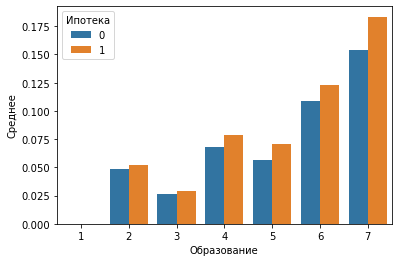

In [61]:
sns.barplot(x="Образование", y="Среднее", hue="Ипотека", data=df_filter_education_)

### Вывод:
С увеличением уровня образования респонденты чаще имеют ипотеку

### Шаг 2. Составьте собственную гипотезу о данных и выполните ее проверку.

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40119 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Возраст                             40119 non-null  int64  
 1   Работа                              40119 non-null  object 
 2   Семейный статус                     40119 non-null  object 
 3   Образование                         40119 non-null  object 
 4   Долг по кредиту                     40119 non-null  object 
 5   Ипотека                             40119 non-null  object 
 6   Займ                                40119 non-null  object 
 7   Контакт                             40119 non-null  object 
 8   Месяц                               40119 non-null  object 
 9   День недели                         40119 non-null  object 
 10  Длительность                        40119 non-null  int64  
 11  Кампания                            40119

In [63]:
df = df.drop(columns=['День'])

In [64]:
df.head()

,Возраст,Работа,Семейный статус,Образование,Долг по кредиту,Ипотека,Займ,Контакт,Месяц,День недели,Длительность,Кампания,Предыдущий контакт,Доходность,Колебание уровня безработицы,Индекс потребительских цен,Индекс потребительской уверенности,Европейская межбанковская ставка,Количество сотрудников в компании,y
0,27,Самозанятый,Не женат / не замужем,Университетская степень,Нет,Нет,Нет,Городской телефон,Октябрь,Пятница,24,1,0,Отсутствует,-0.1,93.8,-40.4,5.0,5195.8,Нет
1,30,Преддприниматель,Женат / замужем,Университетская степень,Нет,Нет,Нет,Городской телефон,Октябрь,Пятница,223,1,0,Отсутствует,-0.1,93.8,-40.4,5.0,5195.8,Да
2,39,Рабочий класс,Женат / замужем,Базовое (9 классов),Нет,Нет,Нет,Городской телефон,Октябрь,Пятница,270,1,0,Отсутствует,-0.1,93.8,-40.4,5.0,5195.8,Да
3,42,Менеджер,Женат / замужем,Высшая школа,Нет,Да,Да,Городской телефон,Октябрь,Пятница,103,1,0,Отсутствует,-0.1,93.8,-40.4,5.0,5195.8,Да
4,42,Самозанятый,Женат / замужем,Базовое (4 класса),Нет,Нет,Нет,Городской телефон,Октябрь,Пятница,478,1,0,Отсутствует,-0.1,93.8,-40.4,5.0,5195.8,Да


In [65]:
df = df.replace({'Ипотека':{'Да':1,'Нет':0}})

In [66]:
df = df.replace({'Долг по кредиту':{'Да':1,'Нет':0}})


In [67]:
df = df.replace({'Займ':{'Да':1,'Нет':0}})

In [68]:
df = df.replace({'y':{'Да':1,'Нет':0}})

In [69]:
df = df.replace({'Работа': {'Студент':1,'Пенсионер':2,'Домохозяйка':3,'Обслуживающий персонал':4,'Рабочий класс':5,'Техник':6,'Менеджер':7,'Самозанятый':8, 'Преддприниматель':9}})

In [70]:
df = df.replace( {'Семейный статус':{'Не женат / не замужем':2, 'Женат / замужем':3, 'Разведен(-а)':1}})

In [71]:
df = df.replace({'Образование':{'Неграмотный':1,'Базовое (4 класса)':2,'Базовое (6 классов)':3,'Базовое (9 классов)':4,'Профессиональный курс':5,'Высшая школа':6,'Университетская степень':7}})

In [72]:
df = df.replace({'Месяц':{'Октябрь':10, 'Август':8, 'Июль':7, 'Июнь':6, 'Май':5, 'Ноябрь':11, 'Декабрь':12, 'Март':3, 'Апрель':4,
 'Сентябрь':9}})

In [73]:
df = df.replace({'Доходность':{'Отсутствует':1, 'Не присутствует':2, 'Присутствует':3}})

In [74]:
df = df.replace({'День недели':{'Пятница':5, 'Понедельник':1, 'Четверг':4, 'Вторник':2, 'Среда':3}})

In [75]:
df.head()

,Возраст,Работа,Семейный статус,Образование,Долг по кредиту,Ипотека,Займ,Контакт,Месяц,День недели,Длительность,Кампания,Предыдущий контакт,Доходность,Колебание уровня безработицы,Индекс потребительских цен,Индекс потребительской уверенности,Европейская межбанковская ставка,Количество сотрудников в компании,y
0,27,8,2,7,0,0,0,Городской телефон,10,5,24,1,0,1,-0.1,93.8,-40.4,5.0,5195.8,0
1,30,9,3,7,0,0,0,Городской телефон,10,5,223,1,0,1,-0.1,93.8,-40.4,5.0,5195.8,1
2,39,5,3,4,0,0,0,Городской телефон,10,5,270,1,0,1,-0.1,93.8,-40.4,5.0,5195.8,1
3,42,7,3,6,0,1,1,Городской телефон,10,5,103,1,0,1,-0.1,93.8,-40.4,5.0,5195.8,1
4,42,8,3,2,0,0,0,Городской телефон,10,5,478,1,0,1,-0.1,93.8,-40.4,5.0,5195.8,1


In [76]:
df.drop(columns = ['Контакт'],axis = 1)

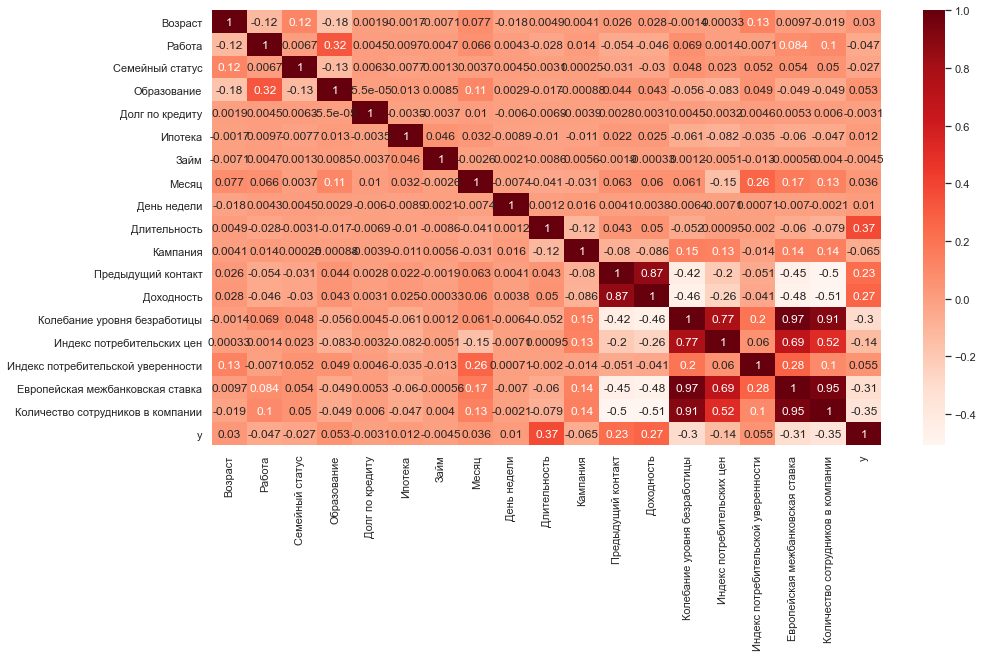

In [77]:
corr = df.corr()
sns.set(rc = {'figure.figsize':(15,8)})

sns.heatmap(corr, cmap="Reds", annot = True);


с помощью метода  heatmap библиотеки seaborn можно посмотреть взаимосвязь зависимой переменной у с независимыми переменными. 
Карта показывает, что влияние на у оказывают в незначительной степени признаки "Длительность", "Доходность", "Предыдущий контакт". Также отрицательная взаимосвязсь с признаками "Европейская межбанковская ставка", "Колебание уровня безработицы"

In [78]:
#Переименуем столбцы для удобства в работе
df.rename(columns = {'Длительность':'Duration','Доходность':'Yield','Предыдущий контакт' : 'Prev_Cont', 'Европейская межбанковская ставка' : 'Interbank_Rate','Колебание уровня безработицы':'Fluctuating_Rate'}, inplace = True)


In [80]:
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import plotly.graph_objects as go
import plotly.express as px
from mpl_toolkits.mplot3d import axes3d

%matplotlib notebook

In [86]:
lm = smf.ols(formula = 'y ~ Duration + Yield + Prev_Cont + Interbank_Rate + Fluctuating_Rate', data=df).fit()
lm.params


Intercept          -8.5e-02
Duration            7.6e-04
Yield               1.3e-01
Prev_Cont          -3.2e-02
Interbank_Rate     -3.3e-02
Fluctuating_Rate   -7.8e-03
dtype: float64

In [87]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     2500.
Date:                Tue, 08 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:47:41   Log-Likelihood:                -5294.1
No. Observations:               40119   AIC:                         1.060e+04
Df Residuals:                   40113   BIC:                         1.065e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0850      0.014     -6.019      0.000      -0.113      -0.057
Duration             0.0008    9.4e-06     80.594      0.000       0.001       0.001
Yield                0.1330      0.006     21.319      0.000       0.121       0.145
Prev_Cont           -0.0323      0.006     -5.673      0.000      -0.043      -0.021
Interbank_Rate      -0.0327      0.003     -9.401      0.000      -0.040      -0.026
Fluctuating_Rate    -0.0078      0.004     -2.052      0.040      -0.015      -0.000
==============================================================================
Omnibus:                    10648.760   Durbin-Watson:                   1.561
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24118.481
Skew:                           1.523   Prob(JB):                         0.00
Kurtosis:                       5.268   Cond. No.                     2.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Вывод:
используя множественную регрессию, выделяем несколько признаков для оценки их влияния на зависимую переменную 
Adj. R-squared = 0.238. 

Попробуем удалять признаки для увеличения Adj. R-squared

In [88]:
lm1 = smf.ols(formula = 'y ~ Duration + Yield + Prev_Cont + Interbank_Rate', data=df).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     3124.
Date:                Tue, 08 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:58:36   Log-Likelihood:                -5296.2
No. Observations:               40119   AIC:                         1.060e+04
Df Residuals:                   40114   BIC:                         1.065e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0615      0.008     -7.424      0.000      -0.078      -0.045
Duration           0.0008   9.39e-06     80.564      0.000       0.001       0.001
Yield              0.1340      0.006     21.554      0.000       0.122       0.146
Prev_Cont         -0.0337      0.006     -5.967      0.000      -0.045      -0.023
Interbank_Rate    -0.0396      0.001    -43.566      0.000      -0.041      -0.038
==============================================================================
Omnibus:                    10685.609   Durbin-Watson:                   1.561
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24293.020
Skew:                           1.527   Prob(JB):                         0.00
Kurtosis:                       5.283   Cond. No.                     2.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
lm2 = smf.ols(formula = 'y ~ Duration + Yield + Prev_Cont', data=df).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     3373.
Date:                Tue, 08 Nov 2022   Prob (F-statistic):               0.00
Time:                        18:59:54   Log-Likelihood:                -6223.5
No. Observations:               40119   AIC:                         1.246e+04
Df Residuals:                   40115   BIC:                         1.249e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2722      0.007    -39.513      0.000      -0.286      -0.259
Duration       0.0008    9.6e-06     80.537      0.000       0.001       0.001
Yield          0.1851      0.006     29.621      0.000       0.173       0.197
Prev_Cont     -0.0118      0.006     -2.051      0.040      -0.023      -0.001
==============================================================================
Omnibus:                    12935.288   Durbin-Watson:                   1.529
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35172.461
Skew:                           1.755   Prob(JB):                         0.00
Kurtosis:                       5.954   Cond. No.                     1.96e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
lm3 = smf.ols(formula = 'y ~ Duration + Yield', data=df).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     5057.
Date:                Tue, 08 Nov 2022   Prob (F-statistic):               0.00
Time:                        19:00:29   Log-Likelihood:                -6225.6
No. Observations:               40119   AIC:                         1.246e+04
Df Residuals:                   40116   BIC:                         1.248e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2612      0.004    -60.172      0.000      -0.270      -0.253
Duration       0.0008    9.6e-06     80.537      0.000       0.001       0.001
Yield          0.1740      0.003     56.122      0.000       0.168       0.180
==============================================================================
Omnibus:                    12919.896   Durbin-Watson:                   1.530
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35066.805
Skew:                           1.754   Prob(JB):                         0.00
Kurtosis:                       5.946   Cond. No.                         959.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
lm4 = smf.ols(formula = 'y ~ Yield', data=df).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     3123.
Date:                Tue, 08 Nov 2022   Prob (F-statistic):               0.00
Time:                        19:01:10   Log-Likelihood:                -9232.0
No. Observations:               40119   AIC:                         1.847e+04
Df Residuals:                   40117   BIC:                         1.849e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1054      0.004    -25.169      0.000      -0.114      -0.097
Yield          0.1865      0.003     55.885      0.000       0.180       0.193
==============================================================================
Omnibus:                    17688.199   Durbin-Watson:                   1.494
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            64800.098
Skew:                           2.315   Prob(JB):                         0.00
Kurtosis:                       7.164   Cond. No.                         5.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Вывод:
удаление признаков привело к уменьшению Adj. R-squared, поэтому необходимо остановиться на первом варианте и сделать заключение, что на признак "y" в незначительной степени влияют признаки 'Длительность','Доходность','Предыдущий контакт', 'Европейская межбанковская ставка','Колебание уровня безработицы'.

При неизменных признаках изменение одного признака на единицу измерения приведет к увеличению процента положительного ответа:
- Длительность разговора - на 0,08
- Доходность - на 13,30

При неизменных признаках изменение одного признака на единицу измерения приведет к снижению процента положительного ответа:
- Предыдущий контакт - на 3,23
- Европейская межбанковская ставка - на 3,27
- Колебание уровня безработицы - на 0,78
